<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK26_W7_Mini_project__Kaggle_Regression_predicting_Life_Expectancy_part2_ML_RF_and_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문제 설명


1) Country : 나라명<br>
2) Year : 조사 연도 (2000 ~ 2015)<br>
3) Status : 국가 개발 정도<br>
4) Life expectancy : 기대 수명 (label_name으로 사용 예정)<br>
5) Adult Mortality : 성인 사망자수(15세 - 60세 사이 1000명 당 사망률)<br>
6) infant deaths : 신생아 사망자수(1000명 당)<br>
7) Alcohol : 인당 순수 알코올 소비량<br>
8) percentage expenditure : GDP 대비 의료비 지출(%)
<br>9) Hepatitis B : 1세 아동 B형 간염 예방 접종률(%)
<br>10) Measles : 1000명 당 홍역 감염 보고 수
<br>11) BMI : 국민 BMI 평균
<br>12) under-five deaths : 1000명 당 5세 이하 사망자 수
<br>13) Polio : 1세 아동 소아 마비 예방 접종률(%)
<br>14) Total expenditure : 총 정부 지출 대비 의료 정부 지출 비율(%)
<br>15) Diphtheria : 1세 아동 디프테리아 독소 및 백일해 예방 접종률(%)
<br>16) HIV/AIDS : 1000명 당 에이즈로 인한 사망자 수
<br>17) GDP : 인당 GDP (단위: USD)
<br>18) Population : 인구 수
<br>19) thinness 10-19 years : 10-19세 청소년 중 마른 비율(%)
<br>20) thinness 5-9 years : 5-9세 유아 중 마른 비율(%)
<br>21) Income composition of resources : 소득 대비 HDI(인간 개발 지수)
<br>22) Schooling : 학교 재학년수

# 2. 라이브러리, 데이터셋 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Codelion_weekly assignments/WK26_W7_Mini_project_Life_expectancy_Regression_ML_modeling_rawdata.csv')
data.shape

(2928, 29)

# 3-4. 데이터 EDA, 전처리, Feature engineering은 part1에

# 5. Train/Test 데이터 만들기

In [ ]:
data.shape

(2928, 29)

In [ ]:
# 회귀 모델 사용하기 전에, 결측치 없는지 한 번 더 확인해줌!
data.isnull().sum().sum()

0

### feature/label variables

In [ ]:
data.columns

Index(['year', 'lifeexpectancy', 'adult_mortality', 'alcoholconsumption',
       'hepb_vac_rates', 'bmi', 'under_five_deaths', 'polio', 'diphtheria',
       'under_four_hiv/aids', 'thinness_10to19', 'thinness_5to9',
       'hd_index_income', 'schooling_years', 'year_range', 'lifeexp_range',
       'adult_mor_over100', 'adult_between_10_and_100', 'adult_under10',
       'Developed', 'Developing', 'Africa', 'Asia', 'Europe', 'North America',
       'Oceania', 'South America', 'nationstatus_temp', 'adult_mor_class'],
      dtype='object')

In [ ]:
label_name = 'lifeexpectancy'

In [ ]:
feature_names = data.columns.tolist()
feature_names.remove(label_name)

delete_list = ['year_range', 'lifeexp_range', 'adult_mor_over100', 'adult_between_10_and_100', 'adult_under10',
       'Asia', 'North America', 'Oceania', 'South America', 'nationstatus_temp', 'adult_mor_class']
for country in delete_list :
    feature_names.remove(country)

feature_names

['year',
 'adult_mortality',
 'alcoholconsumption',
 'hepb_vac_rates',
 'bmi',
 'under_five_deaths',
 'polio',
 'diphtheria',
 'under_four_hiv/aids',
 'thinness_10to19',
 'thinness_5to9',
 'hd_index_income',
 'schooling_years',
 'Developed',
 'Developing',
 'Africa',
 'Europe']

### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X = data[feature_names]
y = data[label_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, random_state = 17, 
                                                    stratify = None)
print(f"X_train.shape: \t\t{X_train.shape} \n X_test.shape: \t\t{X_test.shape} \n y_train.shape: \t{y_train.shape} \n y_test.shape: \t\t{y_test.shape} \n")

X_train.shape: 		(2342, 17) 
 X_test.shape: 		(586, 17) 
 y_train.shape: 	(2342,) 
 y_test.shape: 		(586,) 



#  6. 머신러닝 알고리즘 불러오기
우리가 수업 시간에 배운 CART 계열 Random Forest랑, <br>
아래 알고리즘 시트 기준 가장 적합하다 판단되는 Lasso linear model 두 가지 돌려서 비교해줌

모델 선택
<img src = 'https://scikit-learn.org/stable/_static/ml_map.png'>
[그림 출처 - Scikit-learn.org](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### Random Forest w/ RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# rfreg = RandomForestRegressor(n_estimators = 100, 
#                               max_depth = 10, max_features = 0.8, 
#                               random_state = 17)
rfreg = RandomForestRegressor(n_estimators = 500, 
                              max_depth = 500,
                              random_state = 17)
rfreg

RandomForestRegressor(max_depth=500, n_estimators=500, random_state=17)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth' : np.unique(np.random.randint(10,500, 30)),
                       'max_features' : np.random.uniform(0.6, 0.9, 10)}
reg = RandomizedSearchCV(estimator = rfreg, 
                         param_distributions = param_distributions,
                         n_iter = 5, cv = 6, n_jobs = -1, 
                         verbose = 2, random_state = 17)
reg.fit(X_train, y_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


RandomizedSearchCV(cv=6,
                   estimator=RandomForestRegressor(max_depth=500,
                                                   n_estimators=500,
                                                   random_state=17),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([ 14,  49,  87,  95, 102, 106, 107, 109, 123, 141, 150, 164, 196,
       239, 259, 276, 284, 298, 323, 340, 343, 362, 387, 396, 404, 412,
       426, 449, 472, 483]),
                                        'max_features': array([0.65323315, 0.62655888, 0.76221684, 0.71527714, 0.78835163,
       0.68346495, 0.87975776, 0.78286082, 0.82995136, 0.8815291 ])},
                   random_state=17, verbose=2)

In [ ]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=340, max_features=0.6532331474788475,
                      n_estimators=500, random_state=17)

In [ ]:
best_score = reg.best_score_
best_score

0.9647230293404147

In [ ]:
pd.DataFrame(reg.cv_results_).sort_values('rank_test_score', ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,5.523635,0.031190,0.116728,0.005730,0.653233,340,"{'max_features': 0.6532331474788475, 'max_dept...",0.964912,0.967429,0.962441,0.970938,0.959302,0.963316,0.964723,0.003710,1
3,7.159818,0.225671,0.144482,0.037261,0.683465,196,"{'max_features': 0.6834649535330064, 'max_dept...",0.964912,0.967429,0.962441,0.970938,0.959302,0.963316,0.964723,0.003710,1
4,6.864474,1.352380,0.135543,0.047343,0.626559,426,"{'max_features': 0.6265588847793593, 'max_dept...",0.964295,0.968504,0.963104,0.970057,0.958905,0.962489,0.964559,0.003747,3
2,8.957211,1.499769,0.139945,0.034811,0.879758,164,"{'max_features': 0.8797577576365081, 'max_dept...",0.964023,0.966462,0.962738,0.970710,0.959299,0.963690,0.964487,0.003499,4
1,6.564660,0.463887,0.129769,0.028939,0.788352,107,"{'max_features': 0.7883516286272673, 'max_dept...",0.963680,0.966365,0.962644,0.970391,0.958775,0.963508,0.964227,0.003550,5


#### best model로 학습하기 : y_predict

In [ ]:
best_model

RandomForestRegressor(max_depth=340, max_features=0.6532331474788475,
                      n_estimators=500, random_state=17)

In [ ]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=340, max_features=0.6532331474788475,
                      n_estimators=500, random_state=17)

In [ ]:
# 데이터 예측
y_predict = best_model.predict(X_test)
y_predict[:5]

array([74.6088, 55.2678, 74.6328, 82.8652, 55.272 ])

#### 점수 측정 및 Feature importance 평가

##### 점수 측정

In [ ]:
# MAE
np.abs(y_predict - y_test).mean()

0.9777146757679157

In [ ]:
# MSE
(np.square(y_predict - y_test)).mean()

2.6560936887372177

In [ ]:
# RMSE
np.sqrt(np.square(y_predict - y_test).mean())

1.6297526464887908

In [ ]:
# RMSLE
np.sqrt(np.square(np.log1p(y_predict) - np.log1p(y_test)).mean())

0.024458957470367713

##### feature importance 평가

In [ ]:
best_model.feature_importances_

array([0.00792708, 0.13269796, 0.00738072, 0.00213782, 0.01858098,
       0.01346381, 0.00849533, 0.0096262 , 0.35292911, 0.00946032,
       0.01248996, 0.35777454, 0.06336908, 0.00075853, 0.00115184,
       0.00107859, 0.00067811])

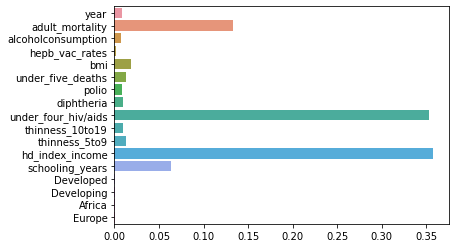

In [ ]:
_ = sns.barplot(x = best_model.feature_importances_, y = best_model.feature_names_in_)

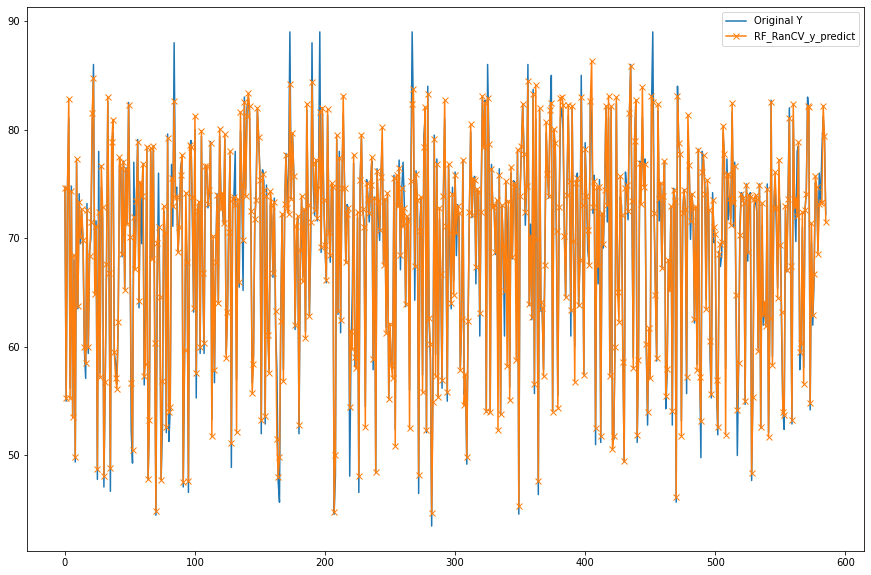

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_predict, '-x', label="RF_RanCV_y_predict")
plt.legend(loc='upper right')
plt.show()

### Lasso
[Scikit-learn 도움말](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [ ]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
ridge_alpha = 1
ridge = Ridge(alpha = ridge_alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
lasso_alpha = 0.1
lasso = Lasso(alpha = lasso_alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
linear_y_hat = linear.predict(X_test)
ridge_y_hat = ridge.predict(X_test)
lasso_y_hat = lasso.predict(X_test)

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))



R2 score - Linear: 0.89, Ridge: 0.89, Lasso: 0.86
MSE - Linear: 10.76, Ridge: 10.86, Lasso: 13.58
MAE - Linear: 2.48, Ridge: 2.50, Lasso: 2.84


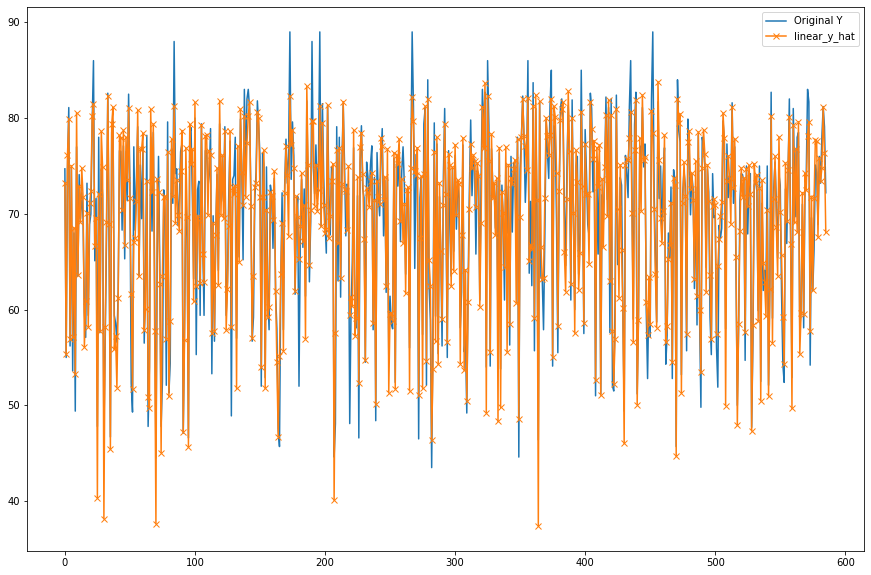

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
# ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
# ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

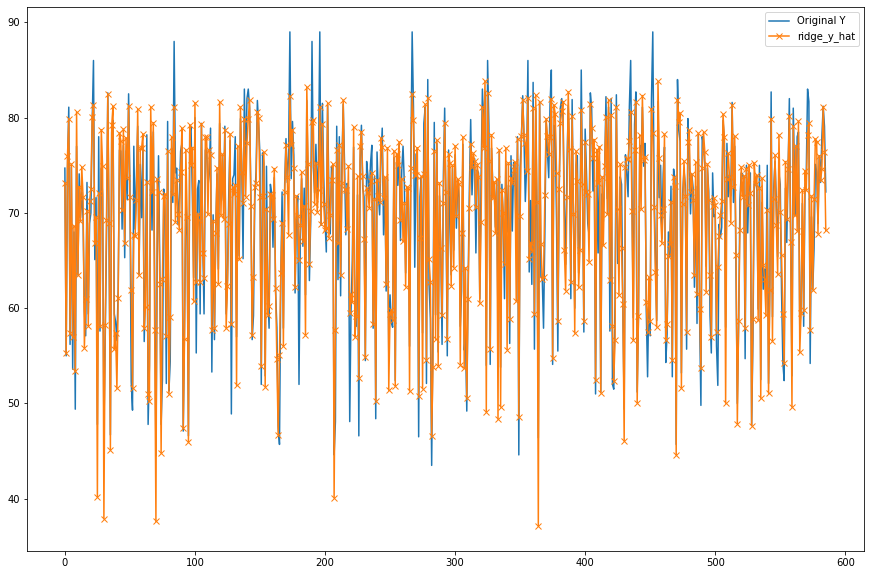

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
# ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
# ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

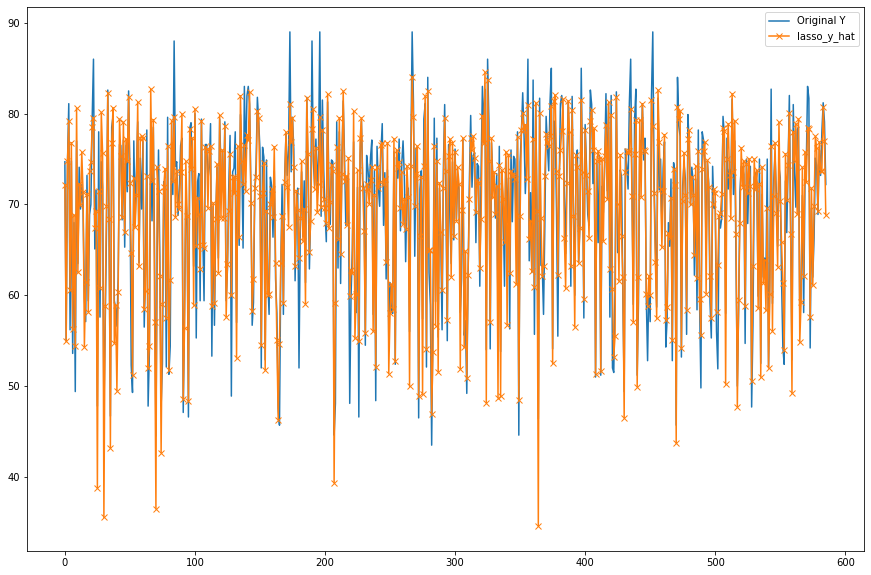

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
# ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
# ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

##### 하이퍼파라미터튜닝(알파값 변경)에 따른 R-square

In [ ]:
ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(X_train,y_train)
  lasso.fit(X_train,y_train)

  ridge_y_hat = ridge.predict(X_test)
  lasso_y_hat = lasso.predict(X_test)

  ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
  ridge_result.append(ridge_r2)
  lasso_result.append(lasso_r2)

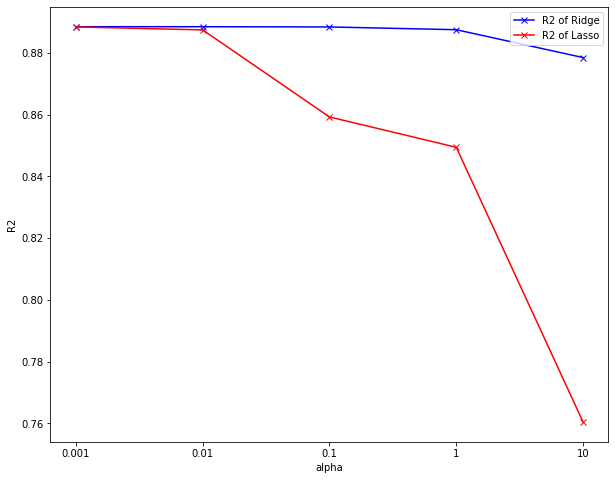

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(range(len(alpha)), ridge_result, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(len(alpha)), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(len(alpha)), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()

라쏘보다 릿지가 조금 좋은 정확도를 나타내고 있음

## Case2. 평향된 분포 log1p 취할 경우
오 전후를 비교해보면, 중요한 피쳐중에 하나인 adult_mortality, bmi, thinness_10to19, thinness_5to9가 상당히 정규분포에 가까워진 모습을 보이는 걸 알 수 있음

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d892d4d50>,
      dtype=object)

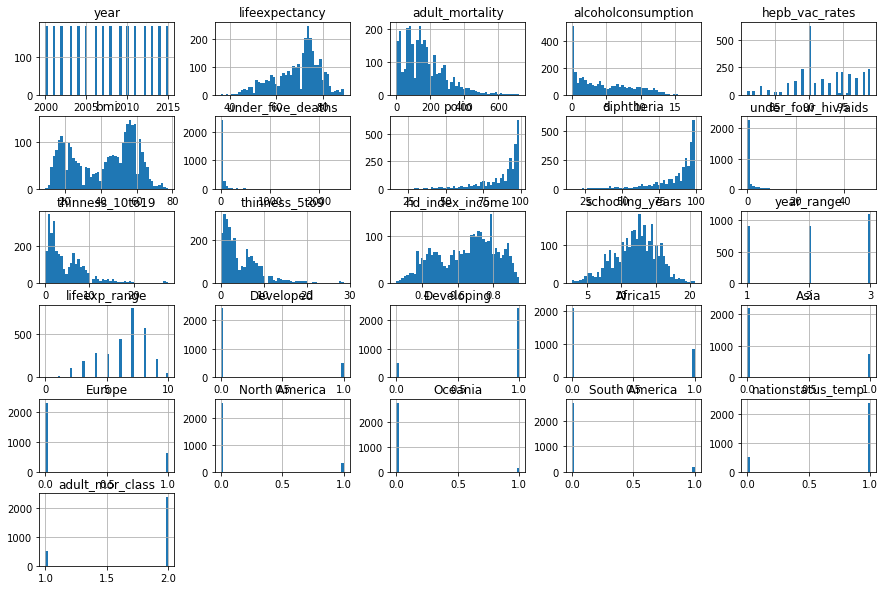

In [ ]:
temp = data.copy()
temp.hist(figsize = (15,10), bins = 50)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d89237310>,
      dtype=object)

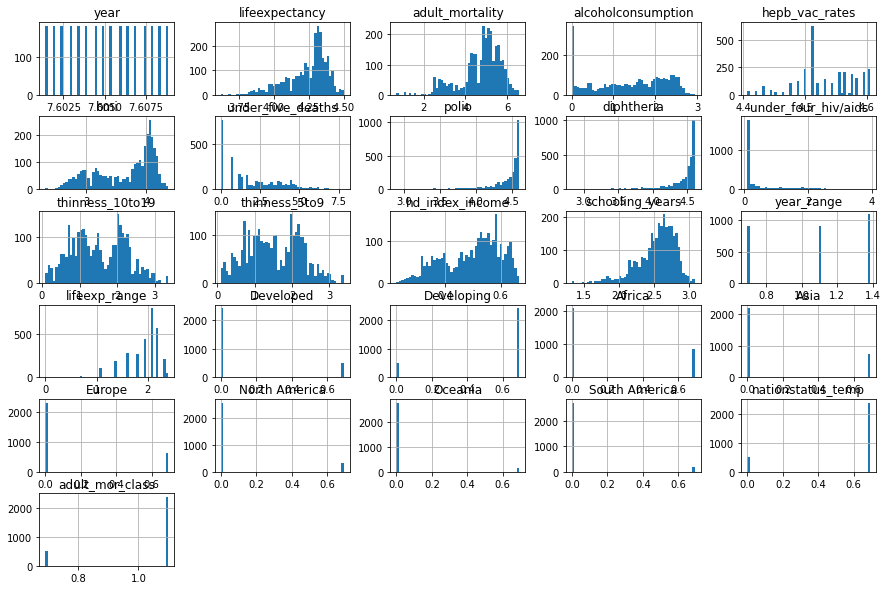

In [ ]:
num_cols = temp.select_dtypes('number').columns.tolist()
for col in num_cols :
    temp[col] = np.log1p(temp[col])

temp.hist(figsize = (15,10), bins = 50)

#### 2-1. adult_mortality, bmi, thinness_10to19, thinness_5to9 얘네 네 개만 로그 씌워줌

In [ ]:
temp = data.copy()
temp['adult_mortality'] = np.log1p(temp['adult_mortality'])
temp['bmi'] = np.log1p(temp['bmi'])
temp['thinness_10to19'] = np.log1p(temp['thinness_10to19'])
temp['thinness_5to9'] = np.log1p(temp['thinness_5to9'])

X_train.shape: 		(2342, 17) 
 X_test.shape: 		(586, 17) 
 y_train.shape: 	(2342,) 
 y_test.shape: 		(586,) 

Random Forest Regressor 불러오기 완료
Fitting 6 folds for each of 5 candidates, totalling 30 fits
하이퍼파라미터 튜닝 완료
Best model :  RandomForestRegressor(max_depth=428, max_features=0.6542291253079348,
                      n_estimators=500, random_state=17)
Best score :  0.9646744841523627
 Best model로 train 데이터 재학습 / test 데이터 예측 완료
점수 요약
MAE : 		0.9790406143344704
MSE: 		2.6645686100341432
RMSE : 		1.6323506394258995
RMSLE : 		0.024480833527944005


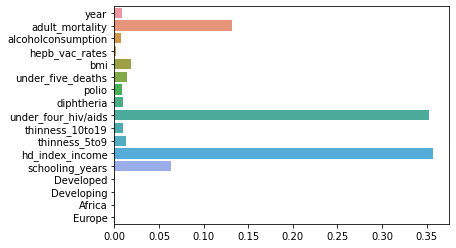

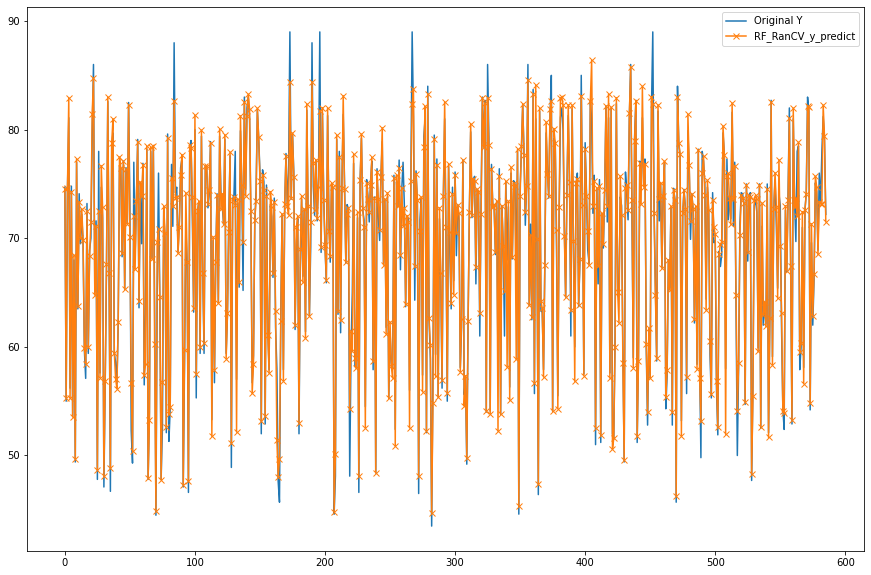

In [ ]:
# 훈련데이터 원본 만들기
X = temp[feature_names]
y = temp[label_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 17, stratify = None)
print(f"X_train.shape: \t\t{X_train.shape} \n X_test.shape: \t\t{X_test.shape} \n y_train.shape: \t{y_train.shape} \n y_test.shape: \t\t{y_test.shape} \n")
# random forest
rfreg = RandomForestRegressor(n_estimators = 500, max_depth = 500,random_state = 17)
print('Random Forest Regressor 불러오기 완료')
# 하이퍼파라미터 튜닝 - randomizedsearchCV 
param_distributions = {'max_depth' : np.unique(np.random.randint(10,500, 30)), 'max_features' : np.random.uniform(0.6, 0.9, 10)}
reg = RandomizedSearchCV(estimator = rfreg, param_distributions = param_distributions,
                         n_iter = 5, cv = 6, n_jobs = -1, verbose = 2, random_state = 17)
reg.fit(X_train, y_train)
print('하이퍼파라미터 튜닝 완료')
# BEST Result
best_model = reg.best_estimator_
print("Best model : ", best_model)
best_score = reg.best_score_
print("Best score : ", best_score)

# best model로 학습 
best_model.fit(X_train, y_train)
# 성능 예측
y_predict = best_model.predict(X_test)
print(' Best model로 train 데이터 재학습 / test 데이터 예측 완료')
# 점수 평가
print(f"점수 요약\nMAE : \t\t{np.abs(y_predict - y_test).mean()}\nMSE: \t\t{(np.square(y_predict - y_test)).mean()}\nRMSE : \t\t{np.sqrt(np.square(y_predict - y_test).mean())}\nRMSLE : \t\t{np.sqrt(np.square(np.log1p(y_predict) - np.log1p(y_test)).mean())}")
# feature importance 평가
_ = sns.barplot(x = best_model.feature_importances_, y = best_model.feature_names_in_)
# 예측 오차 시각화
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_predict, '-x', label="RF_RanCV_y_predict")
plt.legend(loc='upper right')
plt.show()

#### 2-2. 만약 모든 변수 log1p 씌워주면

In [ ]:
temp = data.copy()
for col in num_cols :
    temp[col] = np.log1p(temp[col])

X_train.shape: 		(2342, 17) 
 X_test.shape: 		(586, 17) 
 y_train.shape: 	(2342,) 
 y_test.shape: 		(586,) 

Random Forest Regressor 불러오기 완료
Fitting 6 folds for each of 5 candidates, totalling 30 fits
하이퍼파라미터 튜닝 완료
Best model :  RandomForestRegressor(max_depth=134, max_features=0.6016990203532557,
                      n_estimators=500, random_state=17)
Best score :  0.9644814789004806
 Best model로 train 데이터 재학습 / test 데이터 예측 완료
점수 요약
MAE : 		0.9789070108018408
MSE: 		2.648037108566537
RMSE : 		1.627279050613796
RMSLE : 		0.02433914301940357


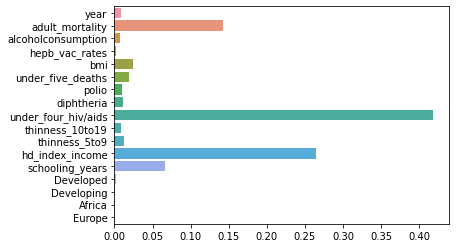

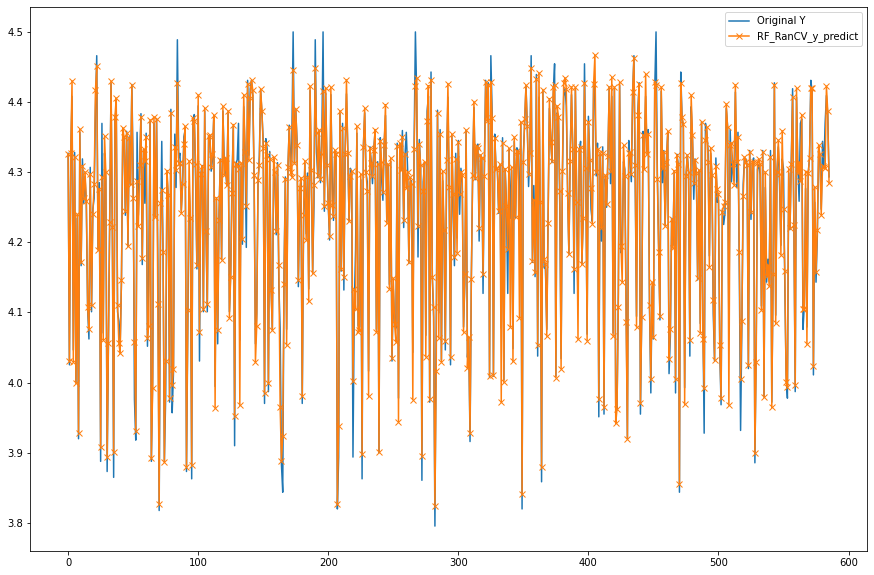

In [ ]:
from re import M
# 훈련데이터 원본 만들기
X = temp[feature_names]
y = temp[label_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 17, stratify = None)
print(f"X_train.shape: \t\t{X_train.shape} \n X_test.shape: \t\t{X_test.shape} \n y_train.shape: \t{y_train.shape} \n y_test.shape: \t\t{y_test.shape} \n")
# random forest
rfreg = RandomForestRegressor(n_estimators = 500, max_depth = 500,random_state = 17)
print('Random Forest Regressor 불러오기 완료')
# 하이퍼파라미터 튜닝 - randomizedsearchCV 
param_distributions = {'max_depth' : np.unique(np.random.randint(10,500, 30)), 'max_features' : np.random.uniform(0.6, 0.9, 10)}
reg = RandomizedSearchCV(estimator = rfreg, param_distributions = param_distributions,
                         n_iter = 5, cv = 6, n_jobs = -1, verbose = 2, random_state = 17)
reg.fit(X_train, y_train)
print('하이퍼파라미터 튜닝 완료')
# BEST Result
best_model = reg.best_estimator_
print("Best model : ", best_model)
best_score = reg.best_score_
print("Best score : ", best_score)

# best model로 학습 
best_model.fit(X_train, y_train)
# 성능 예측
y_predict = best_model.predict(X_test)
print(' Best model로 train 데이터 재학습 / test 데이터 예측 완료')
# 점수 평가
mae = np.abs( (np.exp(y_predict)-1) - (np.exp(y_test)-1) ).mean()
mse = np.square( (np.exp(y_predict)-1) - (np.exp(y_test)-1) ).mean()
rmse = np.sqrt(mse)
print(f"점수 요약\nMAE : \t\t{mae}\nMSE: \t\t{mse}\nRMSE : \t\t{rmse}\nRMSLE : \t\t{np.sqrt(np.square((y_predict) - (y_test)).mean())}")
# feature importance 평가
_ = sns.barplot(x = best_model.feature_importances_, y = best_model.feature_names_in_)
# 예측 오차 시각화
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_predict, '-x', label="RF_RanCV_y_predict")
plt.legend(loc='upper right')
plt.show()

# 7. 결과 요약


평가 항목 | 기본 데이터 | 일부만 log1p | 전부 log1p 
--|--|--|--
MAE|0.978|0.979|0.979
--|--|--|--
MSE|2.656|2.665|2.648
--|--|--|--
RMSE|1.630|1.632|1.623
--|--|--|--
RMSLE|0.024|0.024|0.024


Random Forest 모델을 이용해 세 가지 케이스에 대해 회귀분석을 진행하였음<br>
1. Kaggle에서 주어진 데이터 전처리 및 feature engineering <br>
2. 1번 데이터 기준, 4개 feature만 log1p 씌워줌<br>
3. 1번 데이터 기준, 전체 데이터 log1p 씌워줌<br>
결과적으로 큰 차이는 없으나 MAE를 제외한 모든 지표(MSE, RMSE, RMSLE)에 대하여 그래도 전체 수치형 변수에 log를 씌워줬을 때 지표가 조금 더 개선된 걸 알 수 있음.<br>
아마도 scale이 너무 다른 feature들을, log를 씌워줌으로써 비슷한 범위로 scaling해주는 효과가 있어서 아닐까, 이유를 예상해 봄.